In [49]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import scipy.optimize
import h5py

from astropy.table import Table
#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
plt.style.use('ggplot');
plt.tight_layout();

<Figure size 2000x1500 with 0 Axes>

### Lab 6: Confidence Interval
- Haikun Xue

LHC set up, a Poisson with mean 100:

In [50]:
dsize = int(1e6)
bkgd = stats.norm.rvs(100, size= dsize)

Quick plot of the background:

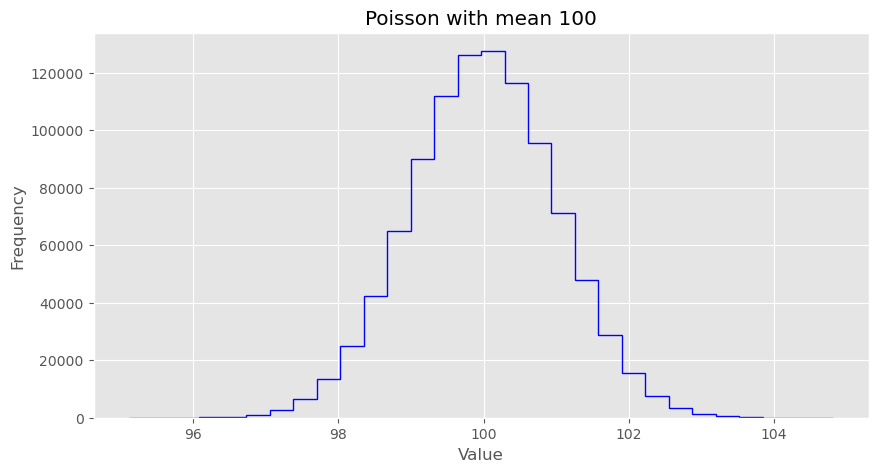

In [51]:
plt.rcParams["figure.figsize"] = (10,5)
fig, ax = plt.subplots(1,1)
ax.hist(bkgd, bins = 30, histtype='step',color = "blue", linewidth = 1);
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Poisson with mean 100");

#### Problem 1:  
To find 5 $\sigma$

In [52]:
prob_5sig = stats.norm.cdf(5)
stats.poisson.ppf(prob_5sig, 100)

154.0

The 5$\sigma$ is at 154 

#### Problem 2:  
Inject signal:  
I chose a signal of 1500 (15 $\sigma$)

In [53]:
signal_1 = np.ones(dsize) * 1500
data_1 = bkgd+ signal_1

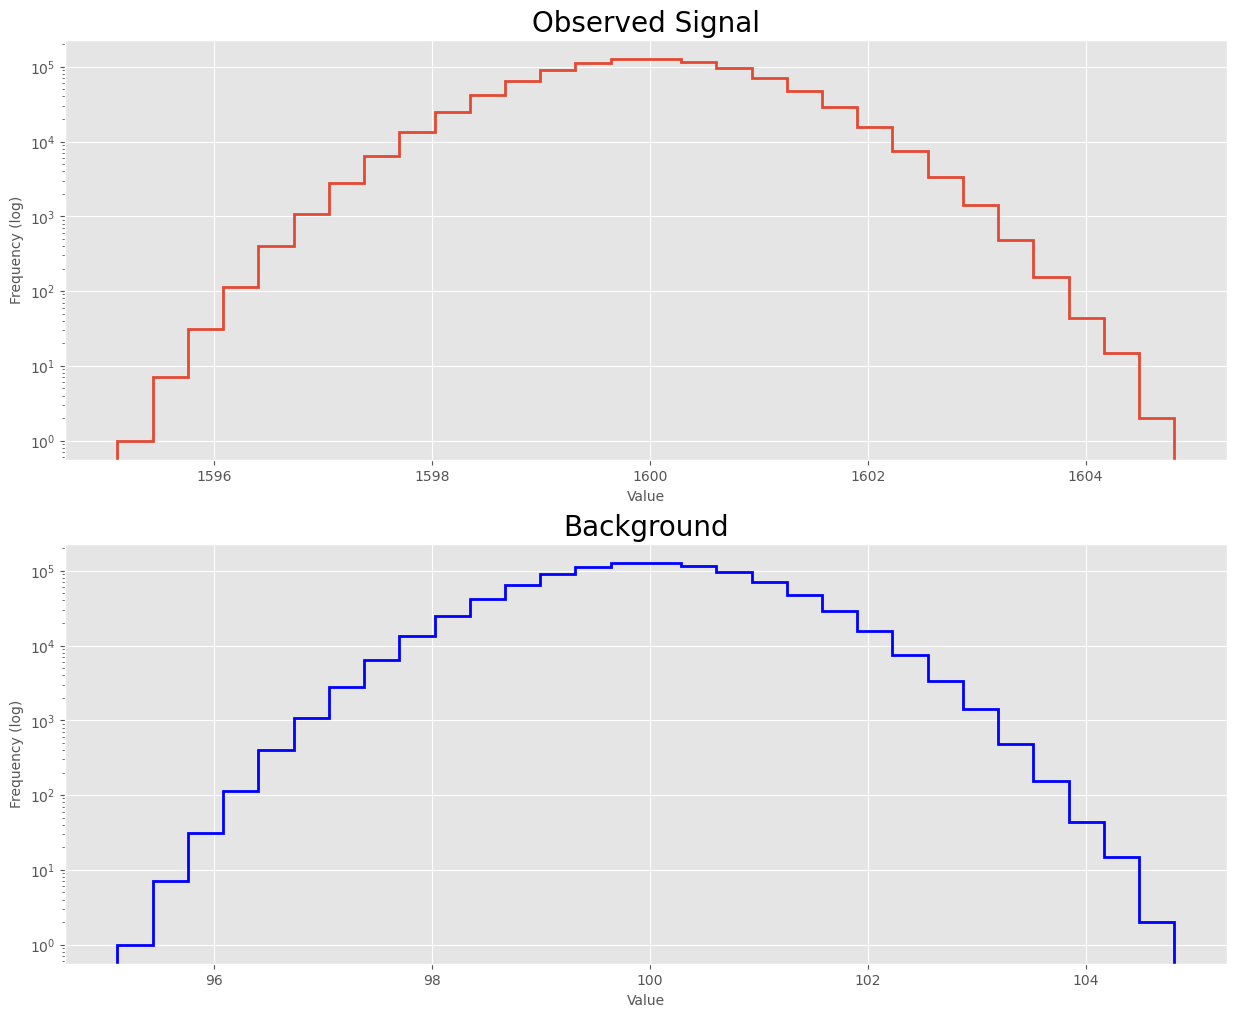

In [54]:
plt.rcParams["figure.figsize"] = (15,12)
fig, ax = plt.subplots(2,1)
ax[0].hist(data_1, bins = 30, histtype='step', linewidth = 2, label = "Observed Signal");
ax[0].set_xlabel("Value", fontsize = 10)
ax[0].set_yscale("log")
ax[0].set_ylabel("Frequency (log)", fontsize = 10)
ax[0].set_title("Observed Signal", fontsize = 20);

ax[1].hist(bkgd, bins = 30, histtype='step',color = "blue", linewidth = 2, label = "Background");
ax[1].set_xlabel("Value",  fontsize = 10)
ax[1].set_ylabel("Frequency (log)",  fontsize = 10)
ax[1].set_yscale("log")
ax[1].set_title("Background", fontsize = 20);

##### a)  
As shown above, the observed signal is very bright, with a mean around 1600,  
and shape of a Poisson distribution.  
It's shape is identical of that of the background,  
only shifted by 1500, the injected signal strength.

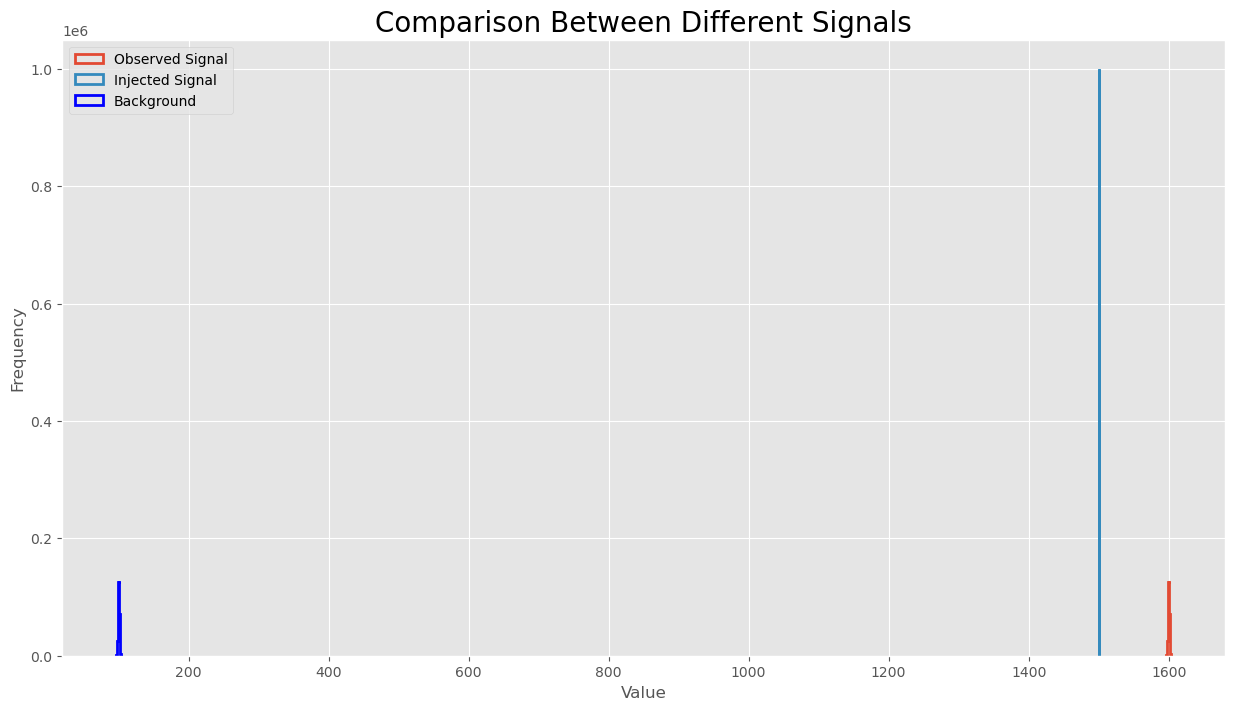

In [55]:
plt.rcParams["figure.figsize"] = (15,8)
fig, ax = plt.subplots(1,1)
ax.hist(data_1, bins = 30, histtype='step', linewidth = 2, label = "Observed Signal");
ax.hist(signal_1, bins = 30, histtype='step', linewidth = 2, label = "Injected Signal");
ax.hist(bkgd, bins = 30, histtype='step',color = "blue", linewidth = 2, label = "Background");
ax.set_xlabel("Value")
ax.set_ylabel("Frequency")
ax.set_title("Comparison Between Different Signals", fontsize = 20);
ax.legend();

##### b)  
The true injected signal is at 1500, thus, almost all of the  
observed signal is greater than the injected signal, and it is biased.  
Th observed signal is not symmetric as it follows a Poisson distribution.

#### Problem 3:  
##### a) 
Inject signal:

The signal should be chosen from an **uniform** distribution  
from 0 to 3500 (35$\sigma$)  

The simulation is asking:   
Assume we have a known constant background distribution of  
a Poisson distribution with mean 100, and the true signal is  
a uniform distribution from 0 to 3500, what would the resuling  
data looks like? How would the data compares to the true signal?

In [56]:
signal_2 = np.random.rand(dsize)*3500
data_2 = bkgd + signal_2

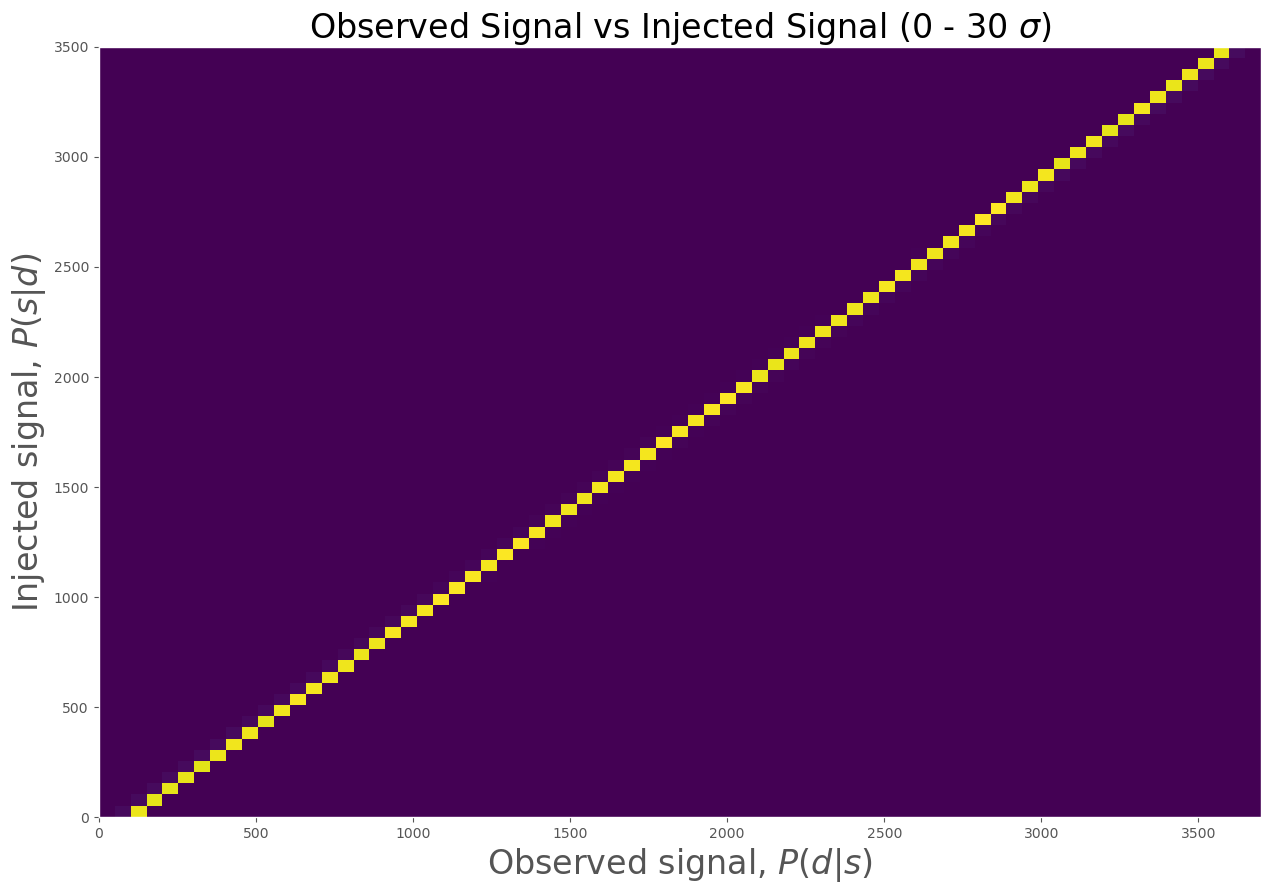

In [57]:
plt.rcParams["figure.figsize"] = (15,10)

signaledges = np.linspace(0,3500,70)
dataedges = np.linspace(0,3700,74)

Psd, temp, temp2= np.histogram2d(data_2,signal_2, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')
plt.ylabel('Injected signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed signal, $P(d|s)$', fontsize = 24);
plt.title('Observed Signal vs Injected Signal (0 - 30 $\sigma$)', fontsize = 24);

##### b) 
To better showcase the distribution around 15$\sigma$,  
we can choose from a smaller range of inserted signals:  
from 1490 (14.9 $\sigma$) to 1510 (15.1 $\sigma$)

In [58]:
signal_3 = np.random.rand(dsize)*20 + 1490
data_3 = bkgd + signal_3

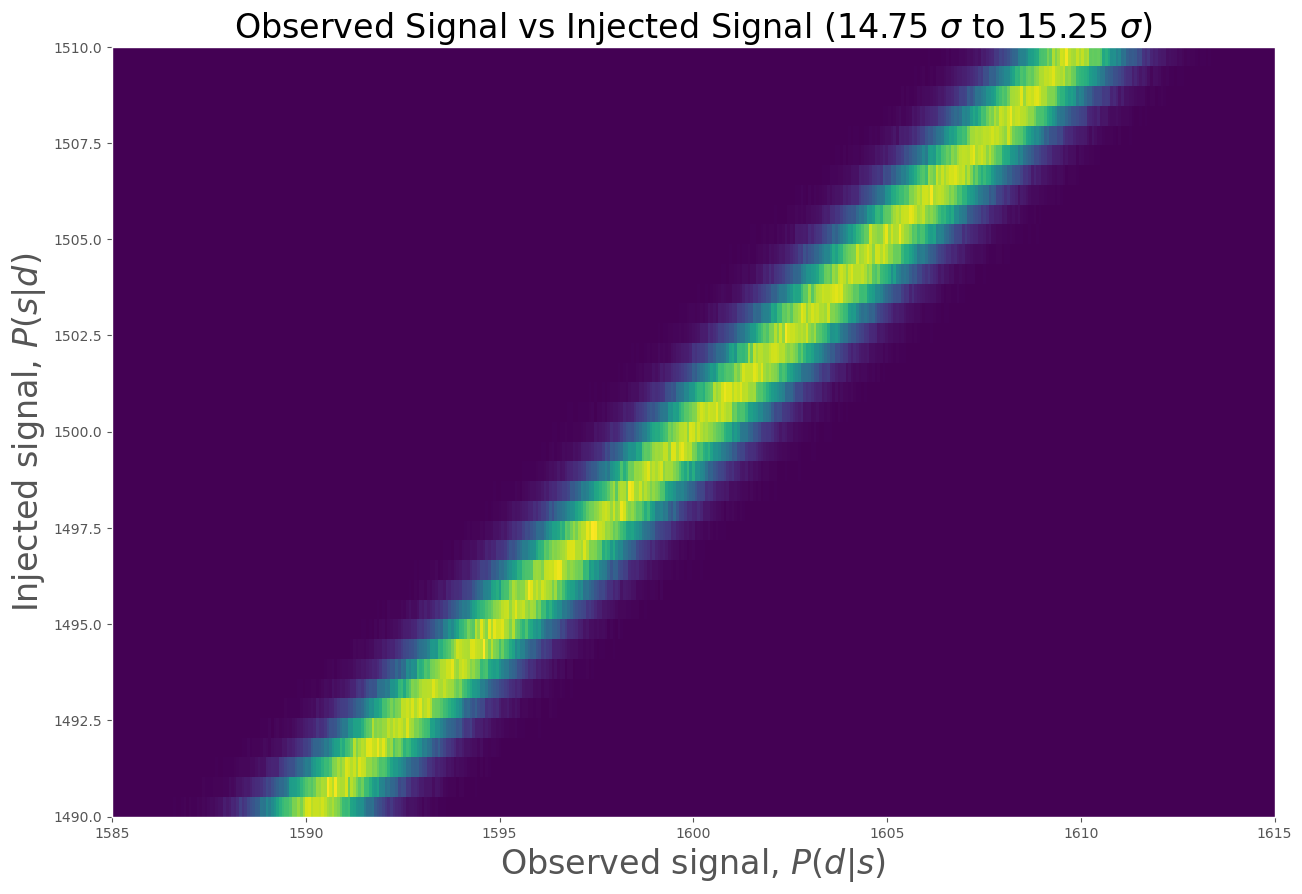

In [59]:
plt.rcParams["figure.figsize"] = (15,10)

signaledges = np.linspace(1490,1510,40)
dataedges = np.linspace(1490+95, 1510 + 105,440)

Psd, temp, temp2= np.histogram2d(data_3,signal_3, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T,shading='auto')
plt.ylabel('Injected signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed signal, $P(d|s)$', fontsize = 24);
plt.title('Observed Signal vs Injected Signal (14.75 $\sigma$ to 15.25 $\sigma$)', fontsize = 24);

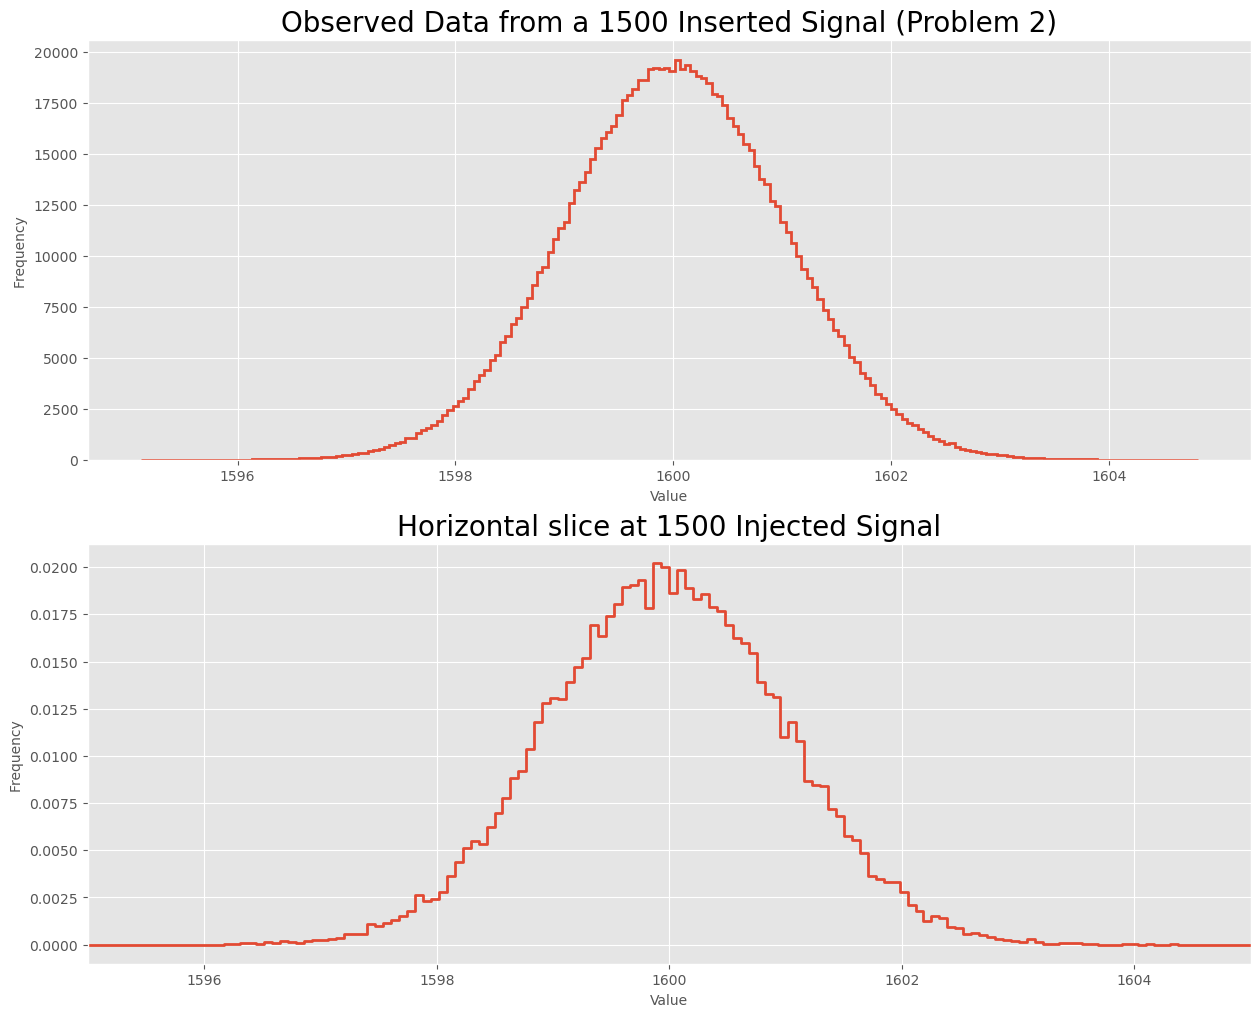

In [60]:
plt.rcParams["figure.figsize"] = (15,12)
fig, ax = plt.subplots(2,1)
ax[0].hist(data_1, bins = 200, histtype='step', linewidth = 2);
ax[0].set_xlabel("Value", fontsize = 10)
ax[0].set_ylabel("Frequency ", fontsize = 10)
ax[0].set_title("Observed Data from a 1500 Inserted Signal (Problem 2)", fontsize = 20);

ax[1].step(datacenters, Psd[:, 19], label = "Horizontal slice at 1200",  linewidth = 2);
ax[1].set_xlabel("Value",  fontsize = 10)
ax[1].set_ylabel("Frequency ",  fontsize = 10)
ax[1].set_xlim([1595,1605])
ax[1].set_title("Horizontal slice at 1500 Injected Signal", fontsize = 20);

##### b)  
As shown above, the graphs are mostly the same.  
The minor variance are due to differences in sample size and bin size.

##### c)  
At a data value of 1600:

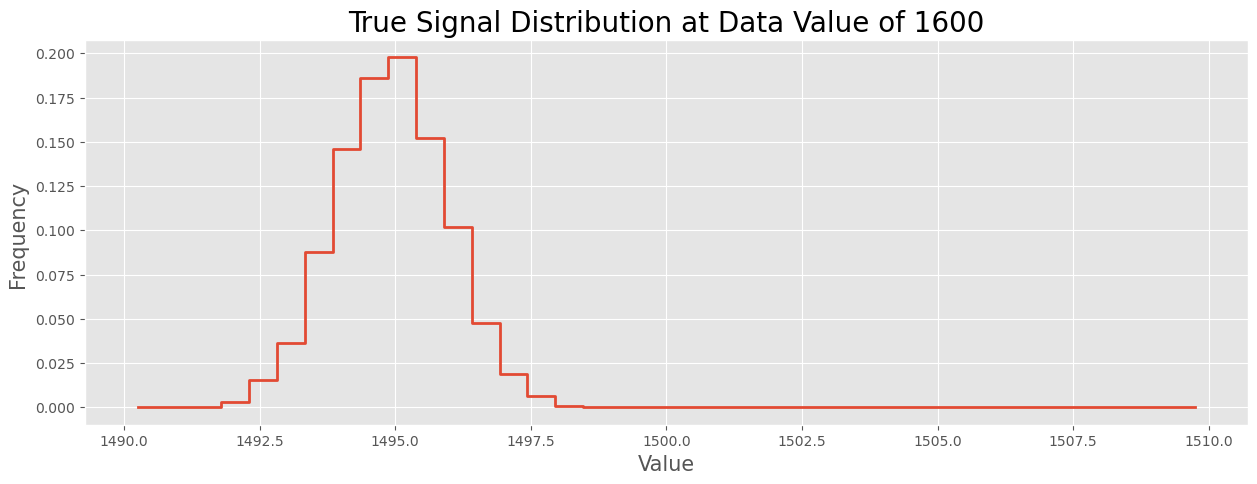

In [61]:
D_1600 = Psd[149 ,:]/ np.sum(Psd[149 ,:])

plt.rcParams["figure.figsize"] = (15,5)
fig, ax = plt.subplots(1,1)
ax.step(signalcenters, D_1600,  linewidth = 2);
ax.set_xlabel("Value", fontsize = 15)
ax.set_ylabel("Frequency ", fontsize = 15)
ax.set_title("True Signal Distribution at Data Value of 1600", fontsize = 20);

The graph illustrated that if we received a data signal of 1600,  
what would the probability distribution of the true signal looks like?  
It would be a Poisson distribution around 1495.

##### d)  


In [62]:
D_sorted = np.sort(D_1600)[::-1]
k = 0
i = 0
while k< stats.norm.cdf(1):
    k += D_sorted[i]
    i += 1
i

6

Then 1 $\sigma$ would be within the 6 highest bins.  
To show it:

In [63]:
D_1sig = D_sorted[:6]
D_1600c = D_1600.copy()
for i, val in enumerate(D_1600c):
    if not (val in D_1sig):
        D_1600c[i] = 0

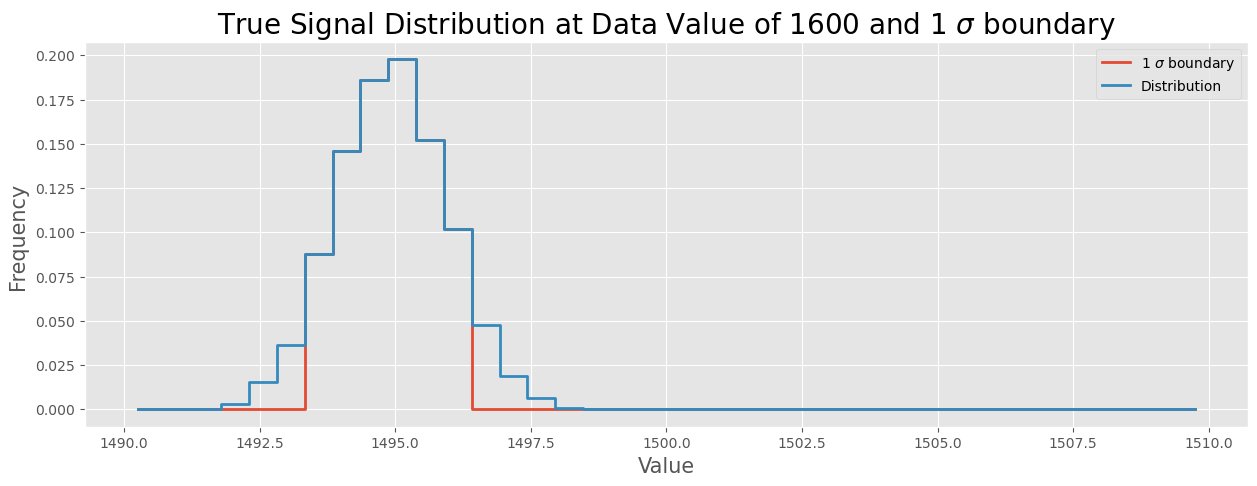

In [64]:
plt.rcParams["figure.figsize"] = (15,5)
fig, ax = plt.subplots(1,1)
ax.step(signalcenters, D_1600c,  linewidth = 2, label = "1 $\sigma$ boundary");
ax.step(signalcenters, D_1600,  linewidth = 2, label = "Distribution");
ax.set_xlabel("Value", fontsize = 15)
ax.set_ylabel("Frequency ", fontsize = 15)
ax.set_title("True Signal Distribution at Data Value of 1600 and 1 $\sigma$ boundary", fontsize = 20);
ax.legend();

##### e)  
As shown about, the 1 $\sigma$ boundary is not quite symmetric, presumably due   
to the Signal distributio being Poisson, which is not a symmetric distribution.  
The boundary does not seem to be biased.